**Face Mask Detection System**
This notebook is Project for IIML Data scicnse course. The objective of the project is to detect human face from the input image and recognize if the person has weared mask or not. 
The project use CNN technique on tensorflow.

Import required libraries

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Set up the parmateres:
FAST_RUN = 
IMAGE width and height in pixels.
Image channels =  dim 1 = height, dim 2 = width, dim 3 = color channels 

In [2]:
#Setting up the parameters
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Upload training dataset for person without wearing mask.  As we are develpoing binary classifier the person not wearing mask is 0 and person wearing mask is appeneded as 1.
Upload data from google drive.

In [3]:
#Creating an array of images for category Clean
from google.colab import drive
gdrive = drive.mount('/content/drive/')
import os
os.listdir()

Mounted at /content/drive/


['.config', 'drive', 'sample_data']

lable data as 1 for images having person wearing mask.

In [5]:
filenames = os.listdir('drive/MyDrive/ImageProcessingProject/with_mask')
categories = []
for filename in filenames:
    categories.append(1)
   

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


Uploading data for person wearing no mask, This data is labled as 0 

In [6]:
filenames = os.listdir("drive/MyDrive/ImageProcessingProject/without_mask")
categories1 = []
for filename in filenames:
    categories1.append(0)
   

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories1
})

Concanate both dataframes

In [7]:
frames = [df, df1]
result = pd.concat(frames)
result.shape

(56751, 2)

Count number of images in both classes to determin how balance dataset is.

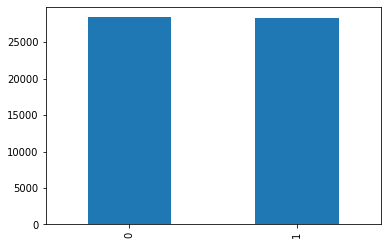

In [8]:
result['category'].value_counts().plot.bar()

Create sequential model instance with APIs Keras.
we are using CNN layer acrhitecture here.

In [9]:
#Creating the structure of Keras (The Deep Learning Library)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
#Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
model.add(BatchNormalization())
#taking the maximum value over an input window of 2,2
model.add(MaxPooling2D(pool_size=(2, 2)))
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
model.add(Dropout(0.25))

#Next Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Next Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
#We flatten the output of the convolutional layers to create a single long feature vector. 
#And it is connected to the final classification model, which is called a fully-connected layer.
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

[link text](https://)Use Early stopping at 10 steps. It will stop  training when a monitored metric has stopped improving.

In [10]:
#Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
#This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
earlystop = EarlyStopping(patience=10)

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

Callbacks can be passed to keras methods such as fit, evaluate, and predict in order to hook into the various stages of the model training and inference lifecycle.

In [14]:
callbacks = [earlystop, learning_rate_reduction]

label data as below 
0: with out mask 1: with masks

In [15]:
result["category"] = result["category"].replace({0: 'Without_mask', 1: 'with_mask'})

Create directory structure from GDrive and load the images

In [16]:
from distutils.dir_util import copy_tree
toDir = "AllTrain"
fromdir = "drive/MyDrive//ImageProcessingProject/with_mask"
copy_tree(fromdir ,toDir)
fromdirNon = "drive/MyDrive//ImageProcessingProject/without_mask"
copy_tree(fromdirNon ,toDir)

['AllTrain/5812.png',
 'AllTrain/5807.png',
 'AllTrain/5795.png',
 'AllTrain/5727.png',
 'AllTrain/5764.png',
 'AllTrain/577.png',
 'AllTrain/5794.png',
 'AllTrain/573.png',
 'AllTrain/5744.png',
 'AllTrain/5776.png',
 'AllTrain/58.png',
 'AllTrain/5799.png',
 'AllTrain/5766.png',
 'AllTrain/5731.png',
 'AllTrain/576.png',
 'AllTrain/5768.png',
 'AllTrain/5757.png',
 'AllTrain/5739.png',
 'AllTrain/5751.png',
 'AllTrain/5775.png',
 'AllTrain/5750.png',
 'AllTrain/5803.png',
 'AllTrain/5748.png',
 'AllTrain/5770.png',
 'AllTrain/5781.png',
 'AllTrain/5754.png',
 'AllTrain/5801.png',
 'AllTrain/5745.png',
 'AllTrain/5836.png',
 'AllTrain/5765.png',
 'AllTrain/575.png',
 'AllTrain/5769.png',
 'AllTrain/5789.png',
 'AllTrain/5780.png',
 'AllTrain/5831.png',
 'AllTrain/5804.png',
 'AllTrain/5838.png',
 'AllTrain/5814.png',
 'AllTrain/5743.png',
 'AllTrain/5767.png',
 'AllTrain/5805.png',
 'AllTrain/5762.png',
 'AllTrain/5798.png',
 'AllTrain/5832.png',
 'AllTrain/5782.png',
 'AllTrain/5742.

Splait the data set for training and validation

In [17]:
train_df, validate_df = train_test_split(result, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

Check how many class images are loaded into train dataframe

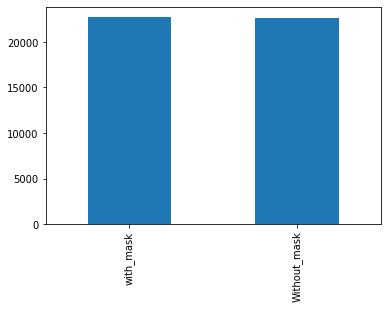

In [18]:
train_df['category'].value_counts().plot.bar()

Check validataion data set  how many class images are loaded

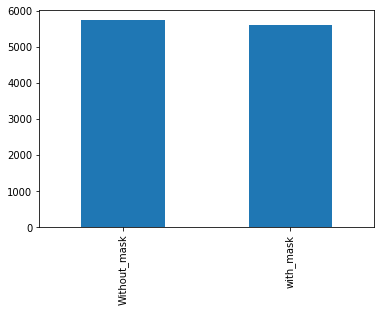

In [19]:
validate_df['category'].value_counts().plot.bar()

In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

Create a source dataset from your input data.
Apply dataset transformations to preprocess the data.
Iterate over the dataset and process the elements.

to create TF data set use ImageDatagenerator API

In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "AllTrain/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 45400 validated image filenames belonging to 2 classes.


In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
     "AllTrain/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 11351 validated image filenames belonging to 2 classes.


Apply data to model to train the model.

In [23]:
epochs=3 if FAST_RUN else 15
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
  16/3026 [..............................] - ETA: 47:46 - loss: 1.7985 - accuracy: 0.7125

KeyboardInterrupt: ignored

we need to save the model to file as H5 file and in JSOn format. Install simplejson package

In [24]:
!pip install simplejson

     |████████████████████████████████| 130 kB 5.3 MB/s 


In [25]:
# serialize model to JSON
import simplejson
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

In [34]:
model.save("drive/MyDrive/ImageProcessingProject/facemask_Detection_model.h5")